<ipython-input-15-605121775af4>:93: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(F, Mag_abs, markerfmt="none", use_line_collection=True)


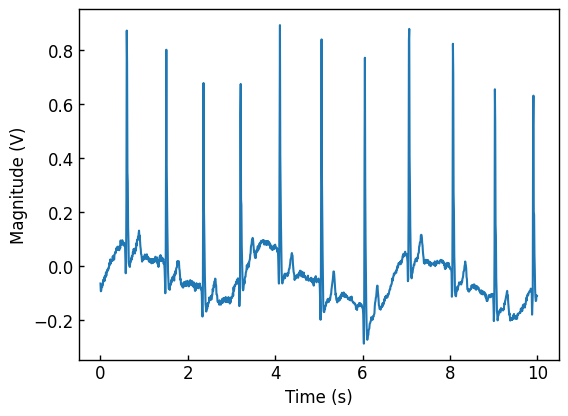

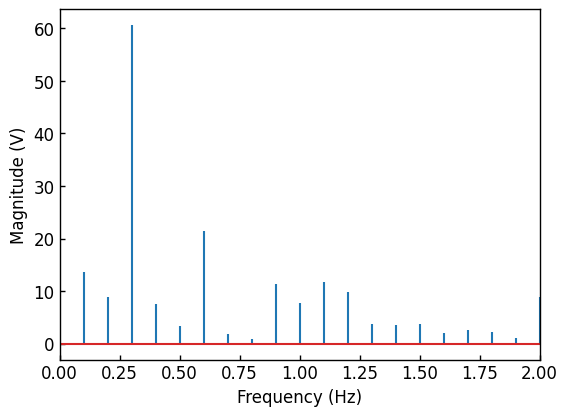

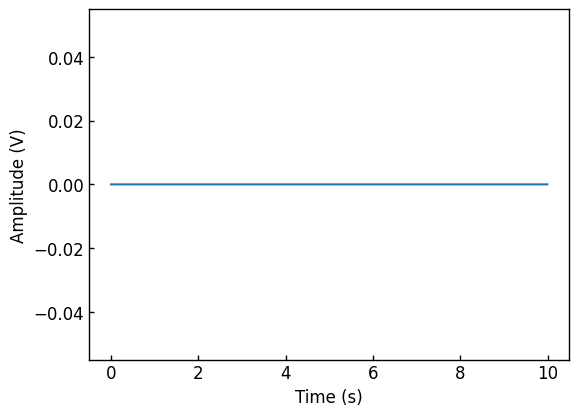

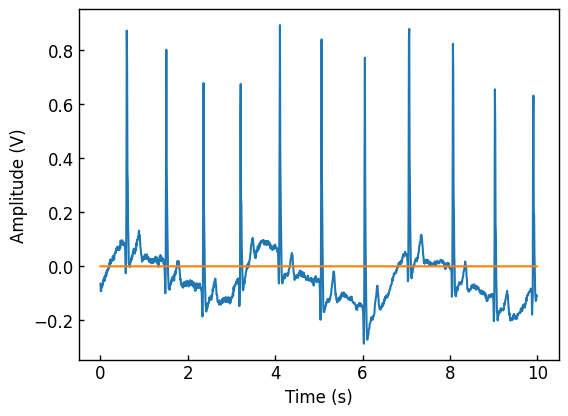

In [15]:
###########################################################################
# 理工学基礎実験B「フーリエ解析と波形の合成」
# 課題３：信号処理への応用（心電図信号の解析）
#
# Original code by Prof. Takanori Uchiyama
# 2022/04/07 Modified by Takuya Tomidokoro
###########################################################################

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

######################## プログラムの使い方 ################################
#
# １．入力データのアップロード
#     ECG_signal.txtファイルをData/Q3フォルダから選んでアップロードする．
#     ※ファイルをアップロードしないと次のステップでエラーを吐いて止まります．
#     ※「アップロードしたファイルはランタイム時にリサイクルされます」という
#       ポップアップが出た場合はそのままOKしてください．
#
# ２．左上の実行ボタンを押す．出力されるファイルの反映にやや時間がかかるため，
#     フォルダの更新ボタン（リロードマーク付きのファルダのアイコン）を押すとよい．
#
# ３．出力されるファイル（ダブルクリックすると右側に中身を表示）
#     ① Q3_amplitude.png  : 振幅スペクトル
#        ※特定の周波数帯をよく見るため横軸の範囲を変えるには，
#          下のminfとmaxfの値を書き換えて実行しなおす．
minf = 0  # ①で表示する横軸の下限値 [Hz]  (min. 0)
maxf = 2  # ①で表示する横軸の上限値 [Hz] (max. 64)
#
#     ② Q3_original.png   : 入力した温度変化のグラフ
#     ③ Q3_recovery.png   : ４で設定する次数の範囲で再構成した波形
#     ④ Q3_recovery2.png  : ②と③を重ねた波形
#
# ４．欲しい周波数帯の波形を抽出するため，再構成する次数の範囲を設定して
#     実行しなおす．
#     ※フーリエ級数の次数と周波数の対応を考えるとよい（サンプリング時間 = 10 s）
degree_low   =   0# 次数の下限
degree_high  =   640# 次数の上限
#
# ５．必要な画像をダウンロードする．
#
############################################################################

### Data loading ###
data_path = "/content/"
file_name = data_path + "ECG_signal.txt"
data = np.loadtxt(file_name)
data = np.array(data)

### Parameter settings ###
NFFT = len(data)
Sa = 128
Fs = float(1)/float(Sa)
t = range(0,NFFT)
t = np.array(t)/float(Sa)

### FFT ###
Mag = np.fft.fft(data,NFFT)
Mag_abs = np.abs(Mag)
Mag_abs[0] = 0
F = np.fft.rfftfreq(NFFT,Fs)
F = F[0:len(F)-1]
Mag_abs = Mag_abs[0:len(F)]

### Signal recovery (IFFT) ###
Mag_tmp = Mag
Mag_tmp[:degree_low-1] = 0
Mag_tmp[degree_high+1:] = 0
r = np.fft.irfft(Mag_tmp,NFFT)

### Create figures ###

plt.rcParams['xtick.direction'] = 'in'  # x scale direction
plt.rcParams['ytick.direction'] = 'in'  # y scale direction
plt.rcParams['xtick.major.width'] = 1.0 # y scale line width
plt.rcParams['ytick.major.width'] = 1.0 # y scale line width
plt.rcParams['font.size'] = 12          # font size
plt.rcParams['axes.linewidth'] = 1.0    # line width
plt.rcParams['figure.subplot.left'] =   0.15 # margin %
plt.rcParams['figure.subplot.bottom'] = 0.15 # margin %

# Q3_original.png
fig1 = plt.figure()
plt.plot(t,data)
plt.xlabel('Time (s)')
plt.ylabel('Magnitude (V)')
fig1.savefig(data_path + "Q3_original.png")

# Q3_amplitude.png
fig2 = plt.figure()
plt.xlim(minf,maxf)
plt.stem(F, Mag_abs, markerfmt="none", use_line_collection=True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (V)')
fig2.savefig(data_path + "Q3_amplitude.png")

# Q3_recovery.png
fig3 = plt.figure()
plt.plot(t,r)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
fig3.savefig(data_path + "Q3_recovery.png")

# Q3_recovery2.png
fig4 = plt.figure()
plt.plot(t,data)
plt.plot(t,r)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
fig4.savefig(data_path + "Q3_recovery2.png")